# Introdución a Dask

## Un breve repaso por los conceptos fundamentales

### Disertante: Matu Varela  

Twitter: @matuvarela

Telegram: m4tuu

Discord: matuu #0630

# PyConAr 2021 - Octubre - Argentina
<br/><br/>
<a href="#Agenda"> >> Agenda</a>

<br/><br/><br/><br/><br/>













# Agenda

- <a href="#Dask" style="font-size:2rem">Dask</a>

- <a href="#Dask-Arrays" style="font-size:2rem">Dask Arrays</a>

- <a href="#Dask-Bag" style="font-size:2rem">Dask Bag</a>

- <a href="#Dask-DataFrame" style="font-size:2rem">Dask DataFrame</a>

- <a href="#Dask-Delayed" style="font-size:2rem">Dask Delayed</a>

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>


# Dask

### Dask es un flexible biblioteca para computación paralela en Python

#### - Programación dinámica de tareas (Dynamic task scheduling) optimizada para el cálculo
#### - _“Big Data” collections_ como _parallel arrays_, dataframes y listas (tal como NumPy, Pandas, etc)

##### Estas coleciones se ejecutan sobre estos programadores de tareas dinamicas.

<img src="images/dask-overview.svg" alt="Dask Overview"  width="600" />

## Sitio oficial: https://dask.org/

### Instalación

#### Podemos instalar usando conda, pip, poetry o desde el código fuente. Con pip es

<code> pip install "dask[complete]"  # Instala todo</code> 

#### Pero podemos instalar sólo el core de dask

<code> pip install dask </code>

#### y luego instalar la dependencia que necesitemos, por ejemplo:

<code>pip install "dask[array]" </code>

<code>pip install "dask[dataframe]"</code>

<code>pip install "dask[distributed]"</code>

Más info en https://docs.dask.org/en/latest/install.html

<br/><br/>
<a href="#Agenda"> >> Agenda</a>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Dask Arrays

Una generalización de los arrays en NumPy, pero que te permite trabajar con datos que no caben en la memoria. 

Te permite escalar tu código NumPy. 

No es *exactamente* la API de NumPy, pero muy similar

![Numpy and Dask Arrays comparison](images/dask_arrys_comp.png)

## Pero pará, qué es NumPy?

- Biblioteca de python que provee arrays multimencionales
- Tiene rutinas que permiten operar muy rápidamente sobre esos arrays
- Tiene una colección de funciones matemáticas de alto nivel

### Veamos un uso simple de NumPy

In [11]:
import numpy as np

x = np.ones((20, 20), dtype=int)
x

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1,

In [12]:
%%time
x.sum()

CPU times: user 77 µs, sys: 187 µs, total: 264 µs
Wall time: 292 µs


400

In [13]:
x = np.random.random(size=(500, 500))
x

array([[0.97485297, 0.57676099, 0.44372251, ..., 0.28585312, 0.6193498 ,
        0.15905171],
       [0.81882849, 0.27099541, 0.5222761 , ..., 0.46392944, 0.81945051,
        0.25173409],
       [0.08343496, 0.86505165, 0.65627701, ..., 0.14114138, 0.56821094,
        0.98462329],
       ...,
       [0.27254719, 0.81304651, 0.32367007, ..., 0.49053416, 0.20829936,
        0.39429979],
       [0.91482728, 0.22772649, 0.78136037, ..., 0.99067511, 0.37229194,
        0.43809807],
       [0.30451196, 0.43687508, 0.52396729, ..., 0.78271005, 0.20662826,
        0.75767556]])

In [14]:
%%time
x.sum()

CPU times: user 1.26 ms, sys: 386 µs, total: 1.65 ms
Wall time: 916 µs


124738.01389205799

In [15]:
%%time
y = x + x.T
y

CPU times: user 3.31 ms, sys: 2.37 ms, total: 5.68 ms
Wall time: 4.53 ms


array([[1.94970595, 1.39558947, 0.52715747, ..., 0.5584003 , 1.53417708,
        0.46356367],
       [1.39558947, 0.54199083, 1.38732775, ..., 1.27697595, 1.047177  ,
        0.68860917],
       [0.52715747, 1.38732775, 1.31255402, ..., 0.46481145, 1.34957131,
        1.50859058],
       ...,
       [0.5584003 , 1.27697595, 0.46481145, ..., 0.98106832, 1.19897447,
        1.17700983],
       [1.53417708, 1.047177  , 1.34957131, ..., 1.19897447, 0.74458387,
        0.64472633],
       [0.46356367, 0.68860917, 1.50859058, ..., 1.17700983, 0.64472633,
        1.51535112]])

In [16]:
%%time
np.mean(y)

CPU times: user 1.87 ms, sys: 1.34 ms, total: 3.21 ms
Wall time: 2.15 ms


0.9979041111364638

Creemos una matriz de 20.000 X 20.000 con valores aleatorios y calculemos la media:

In [17]:
%%time
z = np.random.random(size=(20_000, 20_000))
z.mean(axis=0)

CPU times: user 9.62 s, sys: 6.84 s, total: 16.5 s
Wall time: 22.3 s


array([0.50056997, 0.49675479, 0.49824505, ..., 0.49908231, 0.49864342,
       0.50070222])

In [18]:
z.shape

(20000, 20000)

In [19]:
%%time
h = np.ones((10_000_000, 10_000_000), dtype=int)

Python(40281,0x1119a5e00) malloc: can't allocate region
:*** mach_vm_map(size=800000000000000, flags: 100) failed (error code=3)
Python(40281,0x1119a5e00) malloc: *** set a breakpoint in malloc_error_break to debug


MemoryError: Unable to allocate 728. TiB for an array with shape (10000000, 10000000) and data type int64

## Acá es donde Dask nos puede ayudar!

Dask Array implementa un subset de la interfaz ndarray de NumPy usando técnicas de optimización de uso de memoria (blocked algorithms), dividiendo grandes arrays en muchos más pequeños.

De esa forma, Dask puede computar arrays más grande que la memoria y usando todos los núcleos.


![Dask arrays diagram](images/dask-array-graph.svg)

In [16]:
from dask.distributed import Client
client = Client(n_workers=4)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:56226,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:56241,Total threads: 2
Dashboard: http://127.0.0.1:56245/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:56230,


In [17]:
import dask.array as da

x = da.ones((10_000, 10_000), chunks=(1000, 1000))
x

dask.array<ones_like, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [18]:
%%time
result = x.sum()
result

CPU times: user 7.53 ms, sys: 2.71 ms, total: 10.2 ms
Wall time: 9.01 ms


dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [19]:
%%time
result.compute()

CPU times: user 296 ms, sys: 41.2 ms, total: 337 ms
Wall time: 875 ms


100000000.0

Comparemos los tiempos de ejecución contra el ejemplo anterior en numpy

In [ ]:
# %%time
# z = np.random.random(size=(20_000, 20_000))
# z.mean(axis=0)
# CPU times: user 3.81 s, sys: 1.82 s, total: 5.63 s
# Wall time: 6.38 s

In [20]:
%%time
x = da.random.random(size=(20_000, 20_000), chunks=(1000, 1000))
y = x.mean(axis=0)
y.compute()

CPU times: user 1.61 s, sys: 168 ms, total: 1.77 s
Wall time: 3.58 s


array([0.50169374, 0.50094526, 0.50205583, ..., 0.50205624, 0.49936741,
       0.49962396])

In [21]:
client.close()  # No olvidar cerrar la conexión

Más info en https://docs.dask.org/en/latest/array.html

<br/>
<a href="#Agenda"> >> Agenda</a>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Dask Bag

Implementación de operaciones `map`, `filter`, `fold`, `groupby` entre otras a colecciones Python genéricas. 

Usando iteradores, logra procesar estas operaciones en paralelo utilizando poca memoria.

Comúnmente, utilizaremos Bag para procesar en paralelo **simples operaciones sobre data no estructura o poco estructurada** (text data, logs, JSON, objetos Python definidos por nosotres)

## Leamos data de distintas forma y formato

Primero levantamos el `client` de dask

In [30]:
from dask.distributed import Client

client = Client(n_workers=4)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:56733,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:56751,Total threads: 2
Dashboard: http://127.0.0.1:56754/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:56738,


### Desde una secuencia

In [31]:
import dask.bag as db

b = db.from_sequence([
    'Argentina', 'Bolivia', 'Brasil', 'Chile', 
    'Paraguay', 'Uruguay', 'Perú', 'Colombia', 
    'Venezuela'], npartitions=2)
b

dask.bag<from_sequence, npartitions=2>

In [32]:
b.compute()

['Argentina',
 'Bolivia',
 'Brasil',
 'Chile',
 'Paraguay',
 'Uruguay',
 'Perú',
 'Colombia',
 'Venezuela']

In [33]:
b.take(4)

('Argentina', 'Bolivia', 'Brasil', 'Chile')

### Desde distintos archivos JSON

Primero, creamos los archivos desde un dataset ya construido por Dask

In [34]:
%%time
import dask
import json
import os

b = dask.datasets.make_people()
b.map(json.dumps).to_textfiles('data/people/*.json')

CPU times: user 236 ms, sys: 49.4 ms, total: 285 ms
Wall time: 1.96 s


['/Users/matiavarela/repos/personal/intro-dask-pyconar-2021/data/people/0.json',
 '/Users/matiavarela/repos/personal/intro-dask-pyconar-2021/data/people/1.json',
 '/Users/matiavarela/repos/personal/intro-dask-pyconar-2021/data/people/2.json',
 '/Users/matiavarela/repos/personal/intro-dask-pyconar-2021/data/people/3.json',
 '/Users/matiavarela/repos/personal/intro-dask-pyconar-2021/data/people/4.json',
 '/Users/matiavarela/repos/personal/intro-dask-pyconar-2021/data/people/5.json',
 '/Users/matiavarela/repos/personal/intro-dask-pyconar-2021/data/people/6.json',
 '/Users/matiavarela/repos/personal/intro-dask-pyconar-2021/data/people/7.json',
 '/Users/matiavarela/repos/personal/intro-dask-pyconar-2021/data/people/8.json',
 '/Users/matiavarela/repos/personal/intro-dask-pyconar-2021/data/people/9.json']

In [35]:
# lo leemos con read_text
b = db.read_text('data/people/*.json')
b

dask.bag<bag-from-delayed, npartitions=10>

In [36]:
b.count().compute()

10000

In [37]:
%%time
b.take(2)

CPU times: user 38.7 ms, sys: 10.3 ms, total: 49 ms
Wall time: 63.4 ms


('{"age": 49, "name": ["Antonia", "Crane"], "occupation": "Undertaker", "telephone": "222.606.0010", "address": {"address": "1078 Roemer Avenue", "city": "Duluth"}, "credit-card": {"number": "3703 813344 39995", "expiration-date": "02/19"}}\n',
 '{"age": 35, "name": ["Darby", "Mendoza"], "occupation": "Locksmith", "telephone": "+1-(084)-150-9255", "address": {"address": "1105 Candyland Heights", "city": "Evergreen Park"}, "credit-card": {"number": "3409 271649 11938", "expiration-date": "01/24"}}\n')

In [38]:
%%time
b = b.map(json.loads)
b.take(2)

CPU times: user 50.7 ms, sys: 10.2 ms, total: 60.9 ms
Wall time: 100 ms


({'age': 49,
  'name': ['Antonia', 'Crane'],
  'occupation': 'Undertaker',
  'telephone': '222.606.0010',
  'address': {'address': '1078 Roemer Avenue', 'city': 'Duluth'},
  'credit-card': {'number': '3703 813344 39995', 'expiration-date': '02/19'}},
 {'age': 35,
  'name': ['Darby', 'Mendoza'],
  'occupation': 'Locksmith',
  'telephone': '+1-(084)-150-9255',
  'address': {'address': '1105 Candyland Heights', 'city': 'Evergreen Park'},
  'credit-card': {'number': '3409 271649 11938', 'expiration-date': '01/24'}})

### Manipulando la información

Las operaciones sobre objetos Bag crean nuevos objetos

In [39]:
# Filter

b.filter(lambda record: record['age'] > 25).take(5)

({'age': 49,
  'name': ['Antonia', 'Crane'],
  'occupation': 'Undertaker',
  'telephone': '222.606.0010',
  'address': {'address': '1078 Roemer Avenue', 'city': 'Duluth'},
  'credit-card': {'number': '3703 813344 39995', 'expiration-date': '02/19'}},
 {'age': 35,
  'name': ['Darby', 'Mendoza'],
  'occupation': 'Locksmith',
  'telephone': '+1-(084)-150-9255',
  'address': {'address': '1105 Candyland Heights', 'city': 'Evergreen Park'},
  'credit-card': {'number': '3409 271649 11938', 'expiration-date': '01/24'}},
 {'age': 42,
  'name': ['Andrea', "O'neal"],
  'occupation': 'Metal Worker',
  'telephone': '1-734-989-1190',
  'address': {'address': '623 Krausgrill High Street', 'city': 'Poway'},
  'credit-card': {'number': '5531 6287 0993 4819',
   'expiration-date': '09/22'}},
 {'age': 55,
  'name': ['Sammie', 'Montgomery'],
  'occupation': 'Window Cleaner',
  'telephone': '611-197-7792',
  'address': {'address': '1237 Cadell Grove', 'city': 'San Angelo'},
  'credit-card': {'number': '429

In [40]:
# Map
x = b.map(lambda record: record['name'][0]).take(10)
x

('Antonia',
 'Darby',
 'Andrea',
 'Sammie',
 'Sharolyn',
 'Chieko',
 'Keena',
 'Corliss',
 'Leif',
 'Danny')

In [41]:
%%time
# groupby

# tomemos el primer nombre, y agrupemoslos por el largo (len)
y = b.map(lambda record: record['name'][0])
yg = y.groupby(len).compute()

CPU times: user 419 ms, sys: 51.2 ms, total: 470 ms
Wall time: 1.3 s


In [44]:
yg[2]

(2,
 ['Vi',
  'Vi',
  'Ha',
  'Pa',
  'Pa',
  'An',
  'Jc',
  'Al',
  'Ai',
  'Un',
  'Ja',
  'Ed',
  'Ed',
  'Al',
  'Tu',
  'Ha',
  'Ed',
  'Fe',
  'Fe',
  'Ha',
  'Ed',
  'An',
  'Le',
  'My',
  'Jc',
  'Bo',
  'Al',
  'Al',
  'Pa',
  'Jc',
  'Ka',
  'Ja',
  'Ed',
  'Bo',
  'Al',
  'An',
  'Bo',
  'Vi',
  'Ta',
  'Na',
  'So',
  'Ka',
  'An',
  'Bo',
  'My',
  'An',
  'Le',
  'Ty',
  'Ed',
  'Bo',
  'Bo',
  'Ty',
  'Jc',
  'Fe',
  'Ed',
  'Bo',
  'Bo',
  'Na',
  'Ty',
  'Fe'])

In [45]:
client.close()

Más info en https://docs.dask.org/en/latest/bag.html

<br/>
<a href="#Agenda"> >> Agenda</a>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Dask DataFrame

Un Dask DataFrame es un gran DataFrame paralelo compuesto por muchos Pandas DataFrames más pequeños, divididos a lo largo del índice. 

Una operación de Dask DataFrame desencadena muchas operaciones en los Pandas DataFrames que lo componen.

`dask.dataframe` expone una API que es un subset de la API de pandas.

<img src="images/dask-dataframe.svg" alt="Dataframe diagram" width="300"/>


In [46]:
from dask.distributed import Client

client = Client(n_workers=4)

In [47]:
import dask.dataframe as dd
df = dd.read_json('data/people/*.json', orient='records')

In [48]:
df.head()

,age,name,occupation,telephone,address,credit-card
0,49,"[Antonia, Crane]",Undertaker,222.606.0010,"{'address': '1078 Roemer Avenue', 'city': 'Dul...","{'number': '3703 813344 39995', 'expiration-da..."
1,35,"[Darby, Mendoza]",Locksmith,+1-(084)-150-9255,"{'address': '1105 Candyland Heights', 'city': ...","{'number': '3409 271649 11938', 'expiration-da..."
2,42,"[Andrea, O'neal]",Metal Worker,1-734-989-1190,"{'address': '623 Krausgrill High Street', 'cit...","{'number': '5531 6287 0993 4819', 'expiration-..."
3,55,"[Sammie, Montgomery]",Window Cleaner,611-197-7792,"{'address': '1237 Cadell Grove', 'city': 'San ...","{'number': '4297 0944 2057 5869', 'expiration-..."
4,42,"[Sharolyn, Rivers]",Technical Clerk,1-188-680-8687,"{'address': '164 Bell Field', 'city': 'Mamaron...","{'number': '4195 0139 5898 6499', 'expiration-..."


In [49]:
df.compute().shape

(10000, 6)

In [50]:
df1 = df[df["occupation"] == "Merchant"]

In [51]:
df1.compute()

,age,name,occupation,telephone,address,credit-card
754,21,"[Dennise, Donovan]",Merchant,(044) 433-8112,"{'address': '710 Union Parkway', 'city': 'Tull...","{'number': '4189 5580 4047 9174', 'expiration-..."
987,38,"[Mellie, Pickett]",Merchant,878.408.2061,"{'address': '155 Vassar Bay', 'city': 'Elizabe...","{'number': '4901 6286 7601 5779', 'expiration-..."
55,31,"[Andrew, Ayala]",Merchant,348-399-2007,"{'address': '124 San Lorenzo Extension', 'city...","{'number': '4921 1418 3660 3829', 'expiration-..."
550,18,"[Myrta, Romero]",Merchant,787.550.3395,"{'address': '203 Juan Bautista Drung', 'city':...","{'number': '3729 989469 34887', 'expiration-da..."
600,52,"[Renato, Ruiz]",Merchant,(120) 809-8382,"{'address': '511 Rodgers Extension', 'city': '...","{'number': '3489 297303 05696', 'expiration-da..."
284,38,"[Preston, Hull]",Merchant,112-740-5617,"{'address': '41 Loyola Route', 'city': 'Delano'}","{'number': '4710 2937 1753 4402', 'expiration-..."
486,23,"[Alfonso, Cohen]",Merchant,(074) 024-8404,"{'address': '274 Pemberton Esplanade', 'city':...","{'number': '4320 3752 5896 4759', 'expiration-..."
450,64,"[Isela, Watts]",Merchant,920.749.4749,"{'address': '453 States Ferry', 'city': 'Hemps...","{'number': '4789 1109 6703 7942', 'expiration-..."
673,44,"[Ellyn, Branch]",Merchant,1-605-889-6591,"{'address': '368 Hussey Trail', 'city': 'Durham'}","{'number': '5153 5056 6051 2015', 'expiration-..."


In [55]:
client.close()

Más info en https://docs.dask.org/en/latest/dataframe.html

<br/>
<a href="#Agenda"> >> Agenda</a>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Dask Delayed

Muchas veces lo que queremos resolver no "encaja" en colecciones como `array` o `dataframe`. En esos casos, podemos paralelizar código python usando la API de Dask Delayed.

Son `lazy`, no se van a ejecutar hasta que sea necesario, o llamemos a `compute`.

In [1]:
from dask.distributed import Client

client = Client(n_workers=4)

In [2]:
from time import sleep

def inc(x):
    sleep(.5)
    return x + 1

def double(x):
    sleep(.3)
    return x * 2

def add(x, y):
    sleep(1)
    return x + y

In [3]:
%%time
data = [1, 2, 3, 4, 5]

output = []
for x in data:
    a = inc(x)
    b = double(x)
    c = add(a, b)
    output.append(c)

total = sum(output)

CPU times: user 392 ms, sys: 79.8 ms, total: 472 ms
Wall time: 9.05 s


### Probemos esto con Delayed

In [11]:
%%time
from dask import delayed

output = []
for x in data:
    a = delayed(inc)(x)
    b = delayed(double)(x)
    c = delayed(add)(a, b)
    output.append(c)

total = delayed(sum)(output)

CPU times: user 3.41 ms, sys: 720 µs, total: 4.13 ms
Wall time: 3.88 ms


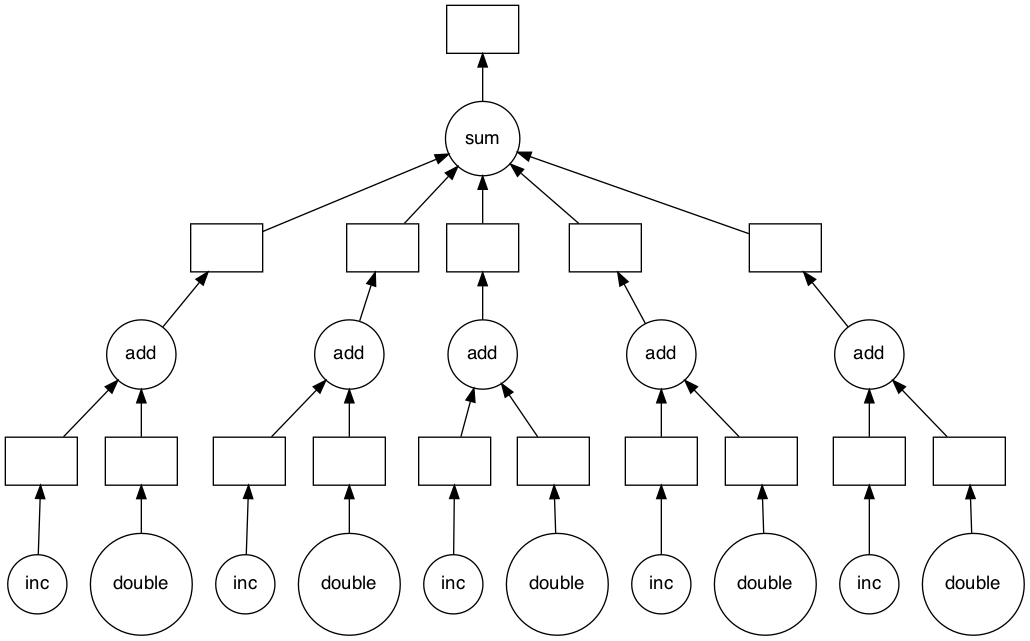

In [12]:
total.visualize()

In [13]:
%%time
total.compute()

CPU times: user 267 ms, sys: 60.5 ms, total: 328 ms
Wall time: 1.97 s


50

### Decorador

Podemos usar `delayed` como decorador, evitando cambiar el algoritmo original

In [14]:
import dask

@dask.delayed
def inc(x):
    return x + 1

@dask.delayed
def double(x):
    return x * 2

@dask.delayed
def add(x, y):
    return x + y

data = [1, 2, 3, 4, 5]

output = []
for x in data:
    a = inc(x)
    b = double(x)
    c = add(a, b)
    output.append(c)

total = dask.delayed(sum)(output)

In [15]:
total.compute()

50

In [16]:
client.close()

Más info en https://docs.dask.org/en/latest/delayed.html

<br/>
<a href="#Muchas-gracias!"> >> Es todo!</a>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

# Muchas gracias!

Recomiendo fuertemente recorrer la documentación oficial de Dask https://docs.dask.org/

También este [curso](https://training.talkpython.fm/courses/details/fundamentals-of-dask-getting-up-to-speed) de TalkPython (free!!!)